In [1]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의 (keras의 callback함수 사용)
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수 (지정하는 윈도우 크기만큼 잘라 데이터셋을 생성한다)
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])            
            dataset_X.append(features)

        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np.array(dataset_X), np.array(dataset_Y)    

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

# 1. 데이터 준비하기

# 음정과 길이를 따로 수치화
code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

# 문자와 숫자로 구성된 음표는 모델 입출력이 불가하기 때문에 dictionary 형태의 코드를 생성한다.
# 도:c 레:d 미:e 파:f 솔:g 라:a 시:b

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0

# 나비야 동요를 통한 시퀀스 데이터 정의 (솔미미파레레도레미파솔솔솔...)

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성 함수를 이용하여 데이터셋 생성 (윈도우 크기 4로 지정)
# ex) 솔미미파(1~4번째 음표) 레(5번째 음표) --> 1~4번째 열 : feature / 5번째 열 : class ==> 윈도우 크기가 4라고 한다.

x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [2]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성
history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

epochs : 0
50/50 - 0s - loss: 2.3073 - accuracy: 0.3400
epochs : 1
50/50 - 0s - loss: 1.9999 - accuracy: 0.3400
epochs : 2
50/50 - 0s - loss: 1.9572 - accuracy: 0.3400
epochs : 3
50/50 - 0s - loss: 1.9397 - accuracy: 0.3400
epochs : 4
50/50 - 0s - loss: 1.9286 - accuracy: 0.3400
epochs : 5
50/50 - 0s - loss: 1.9200 - accuracy: 0.3400
epochs : 6
50/50 - 0s - loss: 1.9127 - accuracy: 0.3400
epochs : 7
50/50 - 0s - loss: 1.9056 - accuracy: 0.3400
epochs : 8
50/50 - 0s - loss: 1.8981 - accuracy: 0.3400
epochs : 9
50/50 - 0s - loss: 1.8895 - accuracy: 0.3400
epochs : 10
50/50 - 0s - loss: 1.8789 - accuracy: 0.3400
epochs : 11
50/50 - 0s - loss: 1.8526 - accuracy: 0.3400
epochs : 12
50/50 - 0s - loss: 1.8278 - accuracy: 0.2800
epochs : 13
50/50 - 0s - loss: 1.8243 - accuracy: 0.3600
epochs : 14
50/50 - 0s - loss: 1.8811 - accuracy: 0.3400
epochs : 15
50/50 - 0s - loss: 1.8040 - accuracy: 0.3400
epochs : 16
50/50 - 0s - loss: 1.7476 - accuracy: 0.3600
epochs : 17
50/50 - 0s - loss: 1.6889 - a

50/50 - 0s - loss: 0.0072 - accuracy: 1.0000
epochs : 141
50/50 - 0s - loss: 0.0068 - accuracy: 1.0000
epochs : 142
50/50 - 0s - loss: 0.0065 - accuracy: 1.0000
epochs : 143
50/50 - 0s - loss: 0.0062 - accuracy: 1.0000
epochs : 144
50/50 - 0s - loss: 0.0059 - accuracy: 1.0000
epochs : 145
50/50 - 0s - loss: 0.0057 - accuracy: 1.0000
epochs : 146
50/50 - 0s - loss: 0.0054 - accuracy: 1.0000
epochs : 147
50/50 - 0s - loss: 0.0052 - accuracy: 1.0000
epochs : 148
50/50 - 0s - loss: 0.0049 - accuracy: 1.0000
epochs : 149
50/50 - 0s - loss: 0.0047 - accuracy: 1.0000
epochs : 150
50/50 - 0s - loss: 0.0045 - accuracy: 1.0000
epochs : 151
50/50 - 0s - loss: 0.0043 - accuracy: 1.0000
epochs : 152
50/50 - 0s - loss: 0.0041 - accuracy: 1.0000
epochs : 153
50/50 - 0s - loss: 0.0039 - accuracy: 1.0000
epochs : 154
50/50 - 0s - loss: 0.0038 - accuracy: 1.0000
epochs : 155
50/50 - 0s - loss: 0.0036 - accuracy: 1.0000
epochs : 156
50/50 - 0s - loss: 0.0035 - accuracy: 1.0000
epochs : 157
50/50 - 0s - l

epochs : 273
50/50 - 0s - loss: 1.5696 - accuracy: 0.6000
epochs : 274
50/50 - 0s - loss: 2.2621 - accuracy: 0.2400
epochs : 275
50/50 - 0s - loss: 1.5609 - accuracy: 0.3800
epochs : 276
50/50 - 0s - loss: 1.3141 - accuracy: 0.4600
epochs : 277
50/50 - 0s - loss: 1.2365 - accuracy: 0.4800
epochs : 278
50/50 - 0s - loss: 1.1239 - accuracy: 0.5200
epochs : 279
50/50 - 0s - loss: 1.0349 - accuracy: 0.5200
epochs : 280
50/50 - 0s - loss: 0.9605 - accuracy: 0.5600
epochs : 281
50/50 - 0s - loss: 0.8596 - accuracy: 0.5800
epochs : 282
50/50 - 0s - loss: 0.8341 - accuracy: 0.6400
epochs : 283
50/50 - 0s - loss: 0.7205 - accuracy: 0.6600
epochs : 284
50/50 - 0s - loss: 0.6417 - accuracy: 0.7200
epochs : 285
50/50 - 0s - loss: 0.6904 - accuracy: 0.7400
epochs : 286
50/50 - 0s - loss: 1.0022 - accuracy: 0.6400
epochs : 287
50/50 - 0s - loss: 0.6818 - accuracy: 0.7800
epochs : 288
50/50 - 0s - loss: 0.6317 - accuracy: 0.7200
epochs : 289
50/50 - 0s - loss: 0.5043 - accuracy: 0.8400
epochs : 290
5

epochs : 411
50/50 - 0s - loss: 6.8215e-04 - accuracy: 1.0000
epochs : 412
50/50 - 0s - loss: 6.5824e-04 - accuracy: 1.0000
epochs : 413
50/50 - 0s - loss: 6.3656e-04 - accuracy: 1.0000
epochs : 414
50/50 - 0s - loss: 6.1554e-04 - accuracy: 1.0000
epochs : 415
50/50 - 0s - loss: 5.9309e-04 - accuracy: 1.0000
epochs : 416
50/50 - 0s - loss: 5.7017e-04 - accuracy: 1.0000
epochs : 417
50/50 - 0s - loss: 5.5811e-04 - accuracy: 1.0000
epochs : 418
50/50 - 0s - loss: 5.4506e-04 - accuracy: 1.0000
epochs : 419
50/50 - 0s - loss: 5.1351e-04 - accuracy: 1.0000
epochs : 420
50/50 - 0s - loss: 4.9638e-04 - accuracy: 1.0000
epochs : 421
50/50 - 0s - loss: 4.8599e-04 - accuracy: 1.0000
epochs : 422
50/50 - 0s - loss: 4.6876e-04 - accuracy: 1.0000
epochs : 423
50/50 - 0s - loss: 4.5075e-04 - accuracy: 1.0000
epochs : 424
50/50 - 0s - loss: 4.3539e-04 - accuracy: 1.0000
epochs : 425
50/50 - 0s - loss: 4.2057e-04 - accuracy: 1.0000
epochs : 426
50/50 - 0s - loss: 4.1055e-04 - accuracy: 1.0000
epochs :

50/50 - 0s - loss: 1.6558e-05 - accuracy: 1.0000
epochs : 544
50/50 - 0s - loss: 1.6126e-05 - accuracy: 1.0000
epochs : 545
50/50 - 0s - loss: 1.5702e-05 - accuracy: 1.0000
epochs : 546
50/50 - 0s - loss: 1.5278e-05 - accuracy: 1.0000
epochs : 547
50/50 - 0s - loss: 1.4853e-05 - accuracy: 1.0000
epochs : 548
50/50 - 0s - loss: 1.4491e-05 - accuracy: 1.0000
epochs : 549
50/50 - 0s - loss: 1.4100e-05 - accuracy: 1.0000
epochs : 550
50/50 - 0s - loss: 1.3714e-05 - accuracy: 1.0000
epochs : 551
50/50 - 0s - loss: 1.3344e-05 - accuracy: 1.0000
epochs : 552
50/50 - 0s - loss: 1.3025e-05 - accuracy: 1.0000
epochs : 553
50/50 - 0s - loss: 1.2674e-05 - accuracy: 1.0000
epochs : 554
50/50 - 0s - loss: 1.2362e-05 - accuracy: 1.0000
epochs : 555
50/50 - 0s - loss: 1.2042e-05 - accuracy: 1.0000
epochs : 556
50/50 - 0s - loss: 1.1730e-05 - accuracy: 1.0000
epochs : 557
50/50 - 0s - loss: 1.1420e-05 - accuracy: 1.0000
epochs : 558
50/50 - 0s - loss: 1.1144e-05 - accuracy: 1.0000
epochs : 559
50/50 - 

epochs : 673
50/50 - 0s - loss: 5.6267e-07 - accuracy: 1.0000
epochs : 674
50/50 - 0s - loss: 5.4359e-07 - accuracy: 1.0000
epochs : 675
50/50 - 0s - loss: 5.3406e-07 - accuracy: 1.0000
epochs : 676
50/50 - 0s - loss: 5.2214e-07 - accuracy: 1.0000
epochs : 677
50/50 - 0s - loss: 5.0545e-07 - accuracy: 1.0000
epochs : 678
50/50 - 0s - loss: 4.9353e-07 - accuracy: 1.0000
epochs : 679
50/50 - 0s - loss: 4.8161e-07 - accuracy: 1.0000
epochs : 680
50/50 - 0s - loss: 4.6730e-07 - accuracy: 1.0000
epochs : 681
50/50 - 0s - loss: 4.5538e-07 - accuracy: 1.0000
epochs : 682
50/50 - 0s - loss: 4.3631e-07 - accuracy: 1.0000
epochs : 683
50/50 - 0s - loss: 4.2200e-07 - accuracy: 1.0000
epochs : 684
50/50 - 0s - loss: 4.1246e-07 - accuracy: 1.0000
epochs : 685
50/50 - 0s - loss: 4.0770e-07 - accuracy: 1.0000
epochs : 686
50/50 - 0s - loss: 4.0293e-07 - accuracy: 1.0000
epochs : 687
50/50 - 0s - loss: 3.9577e-07 - accuracy: 1.0000
epochs : 688
50/50 - 0s - loss: 3.6955e-07 - accuracy: 1.0000
epochs :

50/50 - 0s - loss: 0.0052 - accuracy: 1.0000
epochs : 808
50/50 - 0s - loss: 0.0048 - accuracy: 1.0000
epochs : 809
50/50 - 0s - loss: 0.0045 - accuracy: 1.0000
epochs : 810
50/50 - 0s - loss: 0.0042 - accuracy: 1.0000
epochs : 811
50/50 - 0s - loss: 0.0040 - accuracy: 1.0000
epochs : 812
50/50 - 0s - loss: 0.0038 - accuracy: 1.0000
epochs : 813
50/50 - 0s - loss: 0.0036 - accuracy: 1.0000
epochs : 814
50/50 - 0s - loss: 0.0034 - accuracy: 1.0000
epochs : 815
50/50 - 0s - loss: 0.0033 - accuracy: 1.0000
epochs : 816
50/50 - 0s - loss: 0.0032 - accuracy: 1.0000
epochs : 817
50/50 - 0s - loss: 0.0032 - accuracy: 1.0000
epochs : 818
50/50 - 0s - loss: 0.0031 - accuracy: 1.0000
epochs : 819
50/50 - 0s - loss: 0.0030 - accuracy: 1.0000
epochs : 820
50/50 - 0s - loss: 0.0029 - accuracy: 1.0000
epochs : 821
50/50 - 0s - loss: 0.0028 - accuracy: 1.0000
epochs : 822
50/50 - 0s - loss: 0.0027 - accuracy: 1.0000
epochs : 823
50/50 - 0s - loss: 0.0025 - accuracy: 1.0000
epochs : 824
50/50 - 0s - l

epochs : 945
50/50 - 0s - loss: 4.0516e-04 - accuracy: 1.0000
epochs : 946
50/50 - 0s - loss: 3.9138e-04 - accuracy: 1.0000
epochs : 947
50/50 - 0s - loss: 3.7817e-04 - accuracy: 1.0000
epochs : 948
50/50 - 0s - loss: 3.6550e-04 - accuracy: 1.0000
epochs : 949
50/50 - 0s - loss: 3.5335e-04 - accuracy: 1.0000
epochs : 950
50/50 - 0s - loss: 3.4173e-04 - accuracy: 1.0000
epochs : 951
50/50 - 0s - loss: 3.3055e-04 - accuracy: 1.0000
epochs : 952
50/50 - 0s - loss: 3.1984e-04 - accuracy: 1.0000
epochs : 953
50/50 - 0s - loss: 3.0956e-04 - accuracy: 1.0000
epochs : 954
50/50 - 0s - loss: 2.9969e-04 - accuracy: 1.0000
epochs : 955
50/50 - 0s - loss: 2.9022e-04 - accuracy: 1.0000
epochs : 956
50/50 - 0s - loss: 2.8111e-04 - accuracy: 1.0000
epochs : 957
50/50 - 0s - loss: 2.7233e-04 - accuracy: 1.0000
epochs : 958
50/50 - 0s - loss: 2.6389e-04 - accuracy: 1.0000
epochs : 959
50/50 - 0s - loss: 2.5576e-04 - accuracy: 1.0000
epochs : 960
50/50 - 0s - loss: 2.4792e-04 - accuracy: 1.0000
epochs :

50/50 - 0s - loss: 1.3296e-05 - accuracy: 1.0000
epochs : 1074
50/50 - 0s - loss: 1.2987e-05 - accuracy: 1.0000
epochs : 1075
50/50 - 0s - loss: 1.2674e-05 - accuracy: 1.0000
epochs : 1076
50/50 - 0s - loss: 1.2362e-05 - accuracy: 1.0000
epochs : 1077
50/50 - 0s - loss: 1.2071e-05 - accuracy: 1.0000
epochs : 1078
50/50 - 0s - loss: 1.1785e-05 - accuracy: 1.0000
epochs : 1079
50/50 - 0s - loss: 1.1501e-05 - accuracy: 1.0000
epochs : 1080
50/50 - 0s - loss: 1.1234e-05 - accuracy: 1.0000
epochs : 1081
50/50 - 0s - loss: 1.0967e-05 - accuracy: 1.0000
epochs : 1082
50/50 - 0s - loss: 1.0707e-05 - accuracy: 1.0000
epochs : 1083
50/50 - 0s - loss: 1.0450e-05 - accuracy: 1.0000
epochs : 1084
50/50 - 0s - loss: 1.0207e-05 - accuracy: 1.0000
epochs : 1085
50/50 - 0s - loss: 9.9658e-06 - accuracy: 1.0000
epochs : 1086
50/50 - 0s - loss: 9.7441e-06 - accuracy: 1.0000
epochs : 1087
50/50 - 0s - loss: 9.5152e-06 - accuracy: 1.0000
epochs : 1088
50/50 - 0s - loss: 9.2983e-06 - accuracy: 1.0000
epochs

epochs : 1205
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 1206
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 1207
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 1208
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 1209
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 1210
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 1211
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 1212
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 1213
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 1214
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 1215
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1216
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1217
50/50 - 0s - loss: 0.0010 - accuracy: 1.0000
epochs : 1218
50/50 - 0s - loss: 0.0010 - accuracy: 1.0000
epochs : 1219
50/50 - 0s - loss: 9.6841e-04 - accuracy: 1.0000
epochs : 1220
50/50 - 0s - loss: 9.3411e-04 - accuracy: 1.0000
epochs : 1221
50/50 - 0s - loss: 9.0057e-04 - ac

epochs : 1336
50/50 - 0s - loss: 2.2032e-05 - accuracy: 1.0000
epochs : 1337
50/50 - 0s - loss: 2.1390e-05 - accuracy: 1.0000
epochs : 1338
50/50 - 0s - loss: 2.0768e-05 - accuracy: 1.0000
epochs : 1339
50/50 - 0s - loss: 2.0158e-05 - accuracy: 1.0000
epochs : 1340
50/50 - 0s - loss: 1.9576e-05 - accuracy: 1.0000
epochs : 1341
50/50 - 0s - loss: 1.9018e-05 - accuracy: 1.0000
epochs : 1342
50/50 - 0s - loss: 1.8470e-05 - accuracy: 1.0000
epochs : 1343
50/50 - 0s - loss: 1.7938e-05 - accuracy: 1.0000
epochs : 1344
50/50 - 0s - loss: 1.7433e-05 - accuracy: 1.0000
epochs : 1345
50/50 - 0s - loss: 1.6935e-05 - accuracy: 1.0000
epochs : 1346
50/50 - 0s - loss: 1.6451e-05 - accuracy: 1.0000
epochs : 1347
50/50 - 0s - loss: 1.5998e-05 - accuracy: 1.0000
epochs : 1348
50/50 - 0s - loss: 1.5547e-05 - accuracy: 1.0000
epochs : 1349
50/50 - 0s - loss: 1.5106e-05 - accuracy: 1.0000
epochs : 1350
50/50 - 0s - loss: 1.4689e-05 - accuracy: 1.0000
epochs : 1351
50/50 - 0s - loss: 1.4286e-05 - accuracy:

50/50 - 0s - loss: 1.0866 - accuracy: 0.5400
epochs : 1467
50/50 - 0s - loss: 0.8556 - accuracy: 0.5600
epochs : 1468
50/50 - 0s - loss: 0.8105 - accuracy: 0.6800
epochs : 1469
50/50 - 0s - loss: 0.6907 - accuracy: 0.7600
epochs : 1470
50/50 - 0s - loss: 0.4325 - accuracy: 0.9000
epochs : 1471
50/50 - 0s - loss: 0.4793 - accuracy: 0.8200
epochs : 1472
50/50 - 0s - loss: 0.2333 - accuracy: 0.9200
epochs : 1473
50/50 - 0s - loss: 0.1456 - accuracy: 1.0000
epochs : 1474
50/50 - 0s - loss: 0.1017 - accuracy: 0.9800
epochs : 1475
50/50 - 0s - loss: 0.0722 - accuracy: 1.0000
epochs : 1476
50/50 - 0s - loss: 0.0514 - accuracy: 1.0000
epochs : 1477
50/50 - 0s - loss: 0.1164 - accuracy: 0.9600
epochs : 1478
50/50 - 0s - loss: 0.0903 - accuracy: 0.9800
epochs : 1479
50/50 - 0s - loss: 0.1609 - accuracy: 0.9400
epochs : 1480
50/50 - 0s - loss: 0.3873 - accuracy: 0.8000
epochs : 1481
50/50 - 0s - loss: 0.2658 - accuracy: 0.9400
epochs : 1482
50/50 - 0s - loss: 0.0775 - accuracy: 1.0000
epochs : 14

epochs : 1598
50/50 - 0s - loss: 3.3546e-04 - accuracy: 1.0000
epochs : 1599
50/50 - 0s - loss: 3.2433e-04 - accuracy: 1.0000
epochs : 1600
50/50 - 0s - loss: 3.1361e-04 - accuracy: 1.0000
epochs : 1601
50/50 - 0s - loss: 3.0328e-04 - accuracy: 1.0000
epochs : 1602
50/50 - 0s - loss: 2.9333e-04 - accuracy: 1.0000
epochs : 1603
50/50 - 0s - loss: 2.8371e-04 - accuracy: 1.0000
epochs : 1604
50/50 - 0s - loss: 2.7442e-04 - accuracy: 1.0000
epochs : 1605
50/50 - 0s - loss: 2.6545e-04 - accuracy: 1.0000
epochs : 1606
50/50 - 0s - loss: 2.5681e-04 - accuracy: 1.0000
epochs : 1607
50/50 - 0s - loss: 2.4847e-04 - accuracy: 1.0000
epochs : 1608
50/50 - 0s - loss: 2.4042e-04 - accuracy: 1.0000
epochs : 1609
50/50 - 0s - loss: 2.3269e-04 - accuracy: 1.0000
epochs : 1610
50/50 - 0s - loss: 2.2527e-04 - accuracy: 1.0000
epochs : 1611
50/50 - 0s - loss: 2.1810e-04 - accuracy: 1.0000
epochs : 1612
50/50 - 0s - loss: 2.1124e-04 - accuracy: 1.0000
epochs : 1613
50/50 - 0s - loss: 2.0464e-04 - accuracy:

50/50 - 0s - loss: 0.0025 - accuracy: 1.0000
epochs : 1731
50/50 - 0s - loss: 0.0023 - accuracy: 1.0000
epochs : 1732
50/50 - 0s - loss: 0.0022 - accuracy: 1.0000
epochs : 1733
50/50 - 0s - loss: 0.0021 - accuracy: 1.0000
epochs : 1734
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 1735
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 1736
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 1737
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000
epochs : 1738
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 1739
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 1740
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 1741
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 1742
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 1743
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 1744
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 1745
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1746
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 17

epochs : 1862
50/50 - 0s - loss: 3.6992e-05 - accuracy: 1.0000
epochs : 1863
50/50 - 0s - loss: 3.6036e-05 - accuracy: 1.0000
epochs : 1864
50/50 - 0s - loss: 3.5101e-05 - accuracy: 1.0000
epochs : 1865
50/50 - 0s - loss: 3.4181e-05 - accuracy: 1.0000
epochs : 1866
50/50 - 0s - loss: 3.3316e-05 - accuracy: 1.0000
epochs : 1867
50/50 - 0s - loss: 3.2460e-05 - accuracy: 1.0000
epochs : 1868
50/50 - 0s - loss: 3.1635e-05 - accuracy: 1.0000
epochs : 1869
50/50 - 0s - loss: 3.0824e-05 - accuracy: 1.0000
epochs : 1870
50/50 - 0s - loss: 3.0030e-05 - accuracy: 1.0000
epochs : 1871
50/50 - 0s - loss: 2.9289e-05 - accuracy: 1.0000
epochs : 1872
50/50 - 0s - loss: 2.8540e-05 - accuracy: 1.0000
epochs : 1873
50/50 - 0s - loss: 2.7835e-05 - accuracy: 1.0000
epochs : 1874
50/50 - 0s - loss: 2.7153e-05 - accuracy: 1.0000
epochs : 1875
50/50 - 0s - loss: 2.6447e-05 - accuracy: 1.0000
epochs : 1876
50/50 - 0s - loss: 2.5815e-05 - accuracy: 1.0000
epochs : 1877
50/50 - 0s - loss: 2.5184e-05 - accuracy:

50/50 - 0s - loss: 1.0371e-06 - accuracy: 1.0000
epochs : 1993
50/50 - 0s - loss: 1.0085e-06 - accuracy: 1.0000
epochs : 1994
50/50 - 0s - loss: 9.7513e-07 - accuracy: 1.0000
epochs : 1995
50/50 - 0s - loss: 9.5606e-07 - accuracy: 1.0000
epochs : 1996
50/50 - 0s - loss: 9.3698e-07 - accuracy: 1.0000
epochs : 1997
50/50 - 0s - loss: 9.0599e-07 - accuracy: 1.0000
epochs : 1998
50/50 - 0s - loss: 8.8692e-07 - accuracy: 1.0000
epochs : 1999
50/50 - 0s - loss: 8.5831e-07 - accuracy: 1.0000


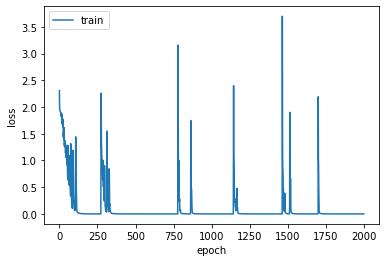

50/50 [==============================] - 0s 580us/step - loss: 8.3446e-07 - accuracy: 1.0000
accuracy: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [3]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

model.reset_states()

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)